# Car Price Prediction

This project work predicts car price. The data that was used is from:https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge.

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,ARDRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

## Overview of Dataset

In [2]:
data = pd.read_csv("car_price_prediction.csv")
print(data.shape)
data.head()

(19237, 18)


ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
for col in data:
    print(f"{col}:{data[col].nunique()}")

ID:18924
Price:2315
Levy:559
Manufacturer:65
Model:1590
Prod. year:54
Category:11
Leather interior:2
Fuel type:7
Engine volume:107
Mileage:7687
Cylinders:13
Gear box type:4
Drive wheels:3
Doors:3
Wheel:2
Color:16
Airbags:17


In [5]:
data.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [6]:
data[data['Levy'] == '-']

ID  Price Levy   Manufacturer      Model  Prod. year  \
2      45774419   8467    -          HONDA        FIT        2006   
9      45756839  26657    -          LEXUS     RX 350        2007   
11     45814819   8781    -           FORD    Transit        1999   
12     45815568   3000    -           OPEL     Vectra        1997   
23     45814106   7840    -           FORD    Transit        2001   
...         ...    ...  ...            ...        ...         ...   
19223  44571028   8781    -          DODGE    Caliber        2008   
19224  45768089  19130    -            KIA  Optima ex        2014   
19226  45796788   7840    -         NISSAN    Skyline        2003   
19229  39977395     50    -         TOYOTA      Prius        2008   
19232  45798355   8467    -  MERCEDES-BENZ    CLK 200        1999   

          Category Leather interior Fuel type Engine volume    Mileage  \
2        Hatchback               No    Petrol           1.3  200000 km   
9             Jeep              Yes    Petrol           3.5  128500 km   
11        Microbus               No       CNG             4       0 km   
12     Goods wagon               No       CNG           1.6  350000 km   
23        Microbus               No    Diesel     2.0 Turbo  230000 km   
...            ...              ...       ...           ...        ...   
19223    Hatchback               No    Petrol           2.4       0 km   
19224        Sedan              Yes    Petrol           2.4   35800 km   
19226        Sedan              Yes    Petrol             3  220000 km   
19229    Hatchback               No    Hybrid           1.5  150000 km   
19232        Coupe              Yes       CNG     2.0 Turbo  300000 km   

       Cylinders Gear box type Drive wheels   Doors             Wheel   Color  \
2            4.0      Variator        Front  04-May  Right-hand drive   Black   
9            6.0     Automatic          4x4  04-May        Left wheel  Silver   
11           8.0        Manual         Rear  02-Mar        Left wheel    Blue   
12           4.0        Manual        Front  04-May        Left wheel   White   
23           4.0        Manual        Front  02-Mar        Left wheel   White   
...          ...           ...          ...     ...               ...     ...   
19223        4.0     Automatic        Front  04-May        Left wheel    Blue   
19224        4.0     Automatic        Front  04-May        Left wheel   Black   
19226        6.0     Tiptronic         Rear  04-May  Right-hand drive   White   
19229        4.0     Automatic        Front  04-May        Left wheel  Silver   
19232        4.0        Manual         Rear  02-Mar        Left wheel  Silver   

       Airbags  
2            2  
9           12  
11           0  
12           4  
23           0  
...        ...  
19223        4  
19224       12  
19226        0  
19229        6  
19232        5  

[5819 rows x 18 columns]

The data showed missing values in the Levy column, we will handle this problem to be solved

In [7]:
# Check duplicate
data.duplicated().sum()

313

In [8]:
# Drop duplicate
data = data.drop_duplicates()
data

ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19233     Tiptronic        Front  04-May        Left wheel     Red        8  
19234     Automatic        Front  04-May        Left wheel    Grey        4  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[18924 rows x 18 columns]

## Data Cleaning

In [9]:
df = data.copy()

In [10]:
df.drop(['ID'], axis=1, inplace=True)

In [11]:
df.shape

(18924, 17)

In [12]:
# check data in price column
df[df['Price']<=500]

Price  Levy   Manufacturer       Model  Prod. year   Category  \
27        30     -         TOYOTA       Prius        2008      Sedan   
33       125  1750         TOYOTA  Highlander        2008      Sedan   
39       314  1399          LEXUS      RX 450        2010       Jeep   
45       220  1194         TOYOTA      Tacoma        2013       Jeep   
53       392  1017  MERCEDES-BENZ       E 300        2017      Sedan   
...      ...   ...            ...         ...         ...        ...   
19215    470   831        HYUNDAI     Elantra        2017      Sedan   
19218     30     -         NISSAN        Note        2006  Hatchback   
19229     50     -         TOYOTA       Prius        2008  Hatchback   
19230    470   645         TOYOTA       Prius        2011  Hatchback   
19236    470   753        HYUNDAI      Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
27                  No    Hybrid           1.5  169000 km        4.0   
33                 Yes    Hybrid           3.3  287274 km        6.0   
39                 Yes    Hybrid           3.5  382746 km        6.0   
45                 Yes    Petrol             4  239342 km        6.0   
53                 Yes    Petrol             2    1600 km        4.0   
...                ...       ...           ...        ...        ...   
19215              Yes    Petrol           1.6   25635 km        4.0   
19218               No    Petrol           1.3       0 km        4.0   
19229               No    Hybrid           1.5  150000 km        4.0   
19230              Yes    Hybrid           1.8  307325 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
27        Automatic        Front  04-May        Left wheel   White        8  
33        Automatic          4x4  04-May        Left wheel   White       12  
39        Automatic          4x4  04-May        Left wheel  Silver       12  
45        Automatic          4x4  04-May        Left wheel  Silver       12  
53        Automatic         Rear  04-May        Left wheel   Black       12  
...             ...          ...     ...               ...     ...      ...  
19215     Automatic        Front  04-May        Left wheel   Black       12  
19218     Automatic        Front  04-May  Right-hand drive   Green        9  
19229     Automatic        Front  04-May        Left wheel  Silver        6  
19230     Automatic        Front  04-May        Left wheel  Silver       12  
19236     Automatic        Front  04-May        Left wheel   White       12  

[1635 rows x 17 columns]

we looked at this data in the Price column and saw the values are unrealistic for a car, so we will limit them to be more realistic

In [13]:
# Limit for a car
df = df[df['Price']>=500]
df['Price'].min()

500

In [14]:
df.shape

(17291, 17)

In [15]:
# Replace the levy column from "-"
df['Levy'].replace({'-':np.nan}, inplace = True)
# Convert the levy column to a float
df['Levy'] = df['Levy'].astype('float64')

In [16]:
# Take the median for "NaN" values
import math
df['Levy'].fillna(math.floor(df['Levy'].median()), inplace=True)

In [17]:
# Replace the mileage column from 'km'
df.Mileage=df.Mileage.apply(lambda x:str(x).replace('km'," "))
# Convert the Mileage column to an int
df.Mileage=df.Mileage.apply(lambda x:int(x))
df.Mileage

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19231    107800
19232    300000
19233    161600
19234    116365
19235     51258
Name: Mileage, Length: 17291, dtype: int64

In [18]:
# Replace the Engine volume column from "turbo"
df['Engine volume']=df['Engine volume'].str.replace(r'\D+','', regex=True).astype('f')
df['Engine volume']

0        35.0
1         3.0
2        13.0
3        25.0
4        13.0
         ... 
19231    35.0
19232    20.0
19233    24.0
19234     2.0
19235     2.0
Name: Engine volume, Length: 17291, dtype: float32

In [19]:
# Replace the Doors column 
df['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)
# Convert the Doors column to an int
df['Doors'] = df['Doors'].astype('int')
df.Doors

0        4
1        4
2        4
3        4
4        4
        ..
19231    4
19232    2
19233    4
19234    4
19235    4
Name: Doors, Length: 17291, dtype: int32

## Exploratory Data Analysis (EDA)

In [20]:
df.describe().T

count          mean           std     min      25%       50%  \
Price          17291.0  2.031866e+04  2.009179e+05   500.0   7683.0   14426.0   
Levy           17291.0  8.622088e+02  3.866614e+02    87.0    730.0     781.0   
Prod. year     17291.0  2.010852e+03  5.673477e+00  1943.0   2009.0    2012.0   
Engine volume  17291.0  1.748285e+01  1.208721e+01     0.0      3.0      17.0   
Mileage        17291.0  1.497552e+06  4.763244e+07     0.0  70023.5  124912.0   
Cylinders      17291.0  4.553872e+00  1.184012e+00     1.0      4.0       4.0   
Doors          17291.0  3.920016e+00  4.165727e-01     2.0      4.0       4.0   
Airbags        17291.0  6.469319e+00  4.203791e+00     0.0      4.0       4.0   

                    75%           max  
Price           23521.0  2.630750e+07  
Levy              891.0  1.171400e+04  
Prod. year       2015.0  2.020000e+03  
Engine volume      25.0  7.300000e+01  
Mileage        185318.0  2.147484e+09  
Cylinders           4.0  1.600000e+01  
Doors               4.0  5.000000e+00  
Airbags            12.0  1.600000e+01

In [21]:
# Split the data into two parts.
df_num = df.select_dtypes(exclude='object')
df_obj = df.select_dtypes(include='object')

enc = LabelEncoder()
for i in range(0, df_obj.shape[1]):
    df_obj.iloc[:,i] = enc.fit_transform(df_obj.iloc[:,i])

C:\Users\AJI\AppData\Local\Temp\ipykernel_6732\1361462772.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_obj.iloc[:,i] = enc.fit_transform(df_obj.iloc[:,i])


In [22]:
full_df = pd.concat([df_num, df_obj], axis = 1)

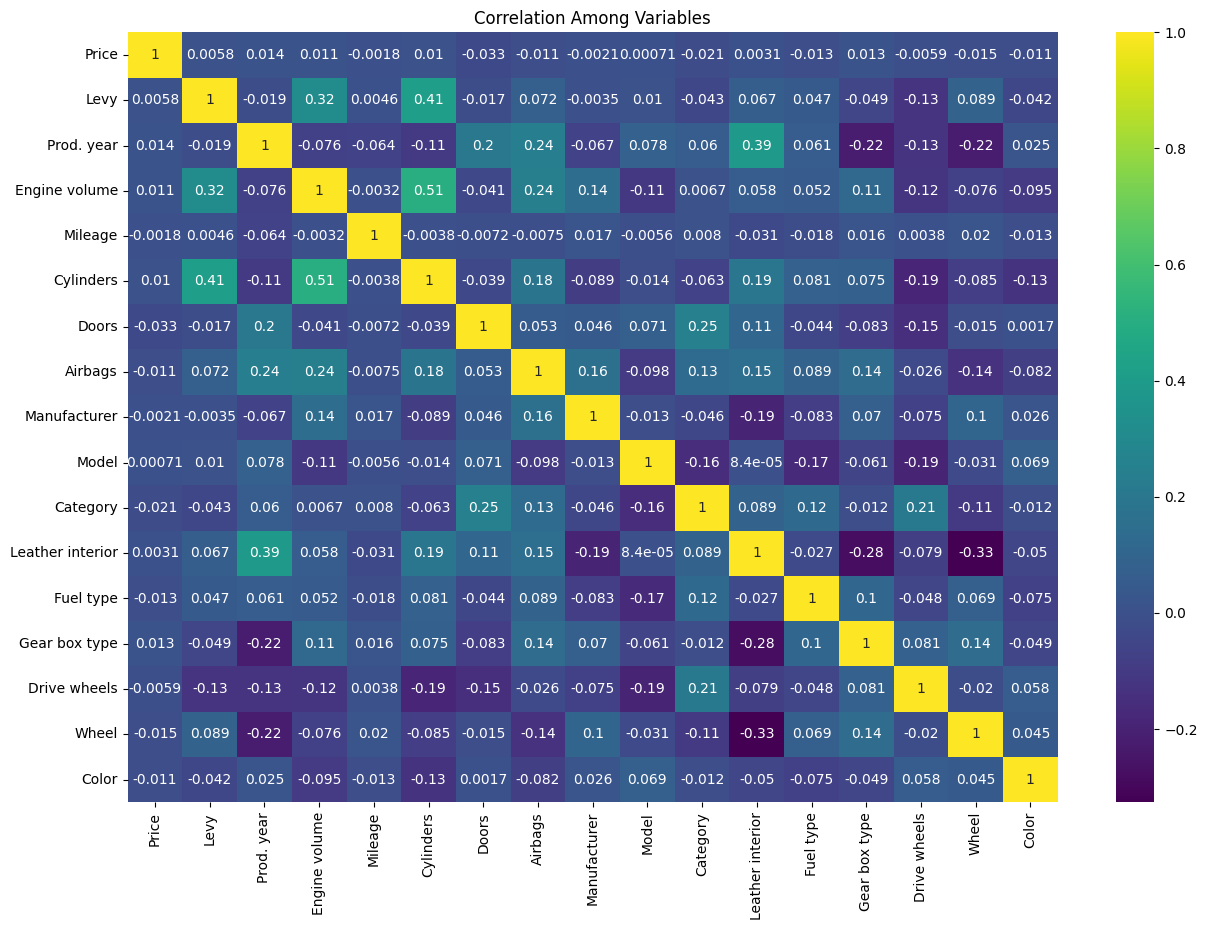

In [23]:
# Check the correlation among variables
corr = full_df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr, cmap="viridis",annot=True)
plt.title("Correlation Among Variables")
plt.show()

In [24]:
# Split the parts that are considered less correlated.
full_df.drop(["Manufacturer","Drive wheels","Wheel","Color","Category"], axis=1, inplace=True)

In [25]:
full_df.head()

Price    Levy  Prod. year  Engine volume  Mileage  Cylinders  Doors  \
0  13328  1399.0        2010           35.0   186005        6.0      4   
1  16621  1018.0        2011            3.0   192000        6.0      4   
2   8467   781.0        2006           13.0   200000        4.0      4   
3   3607   862.0        2011           25.0   168966        4.0      4   
4  11726   446.0        2014           13.0    91901        4.0      4   

   Airbags  Model  Leather interior  Fuel type  Gear box type  
0       12   1230                 1          2              0  
1        8    650                 0          5              2  
2        2    676                 0          5              3  
3        0    653                 1          2              0  
4        4    676                 1          5              0

In [26]:
full_df.corr()['Price'].sort_values()

Doors              -0.032611
Fuel type          -0.013180
Airbags            -0.011343
Mileage            -0.001764
Model               0.000713
Leather interior    0.003072
Levy                0.005834
Cylinders           0.010107
Engine volume       0.010703
Gear box type       0.012700
Prod. year          0.014341
Price               1.000000
Name: Price, dtype: float64

In [27]:
col = ['Manufacturer','Category']
for i in col:
    print(i,": ")
    print(df[i].unique())

Manufacturer : 
['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'ACURA' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'FERRARI' 'MASERATI' 'SAAB' 'LAMBORGHINI' 'PONTIAC' 'SATURN'
 'ASTON MARTIN' 'GREATWALL']
Category : 
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


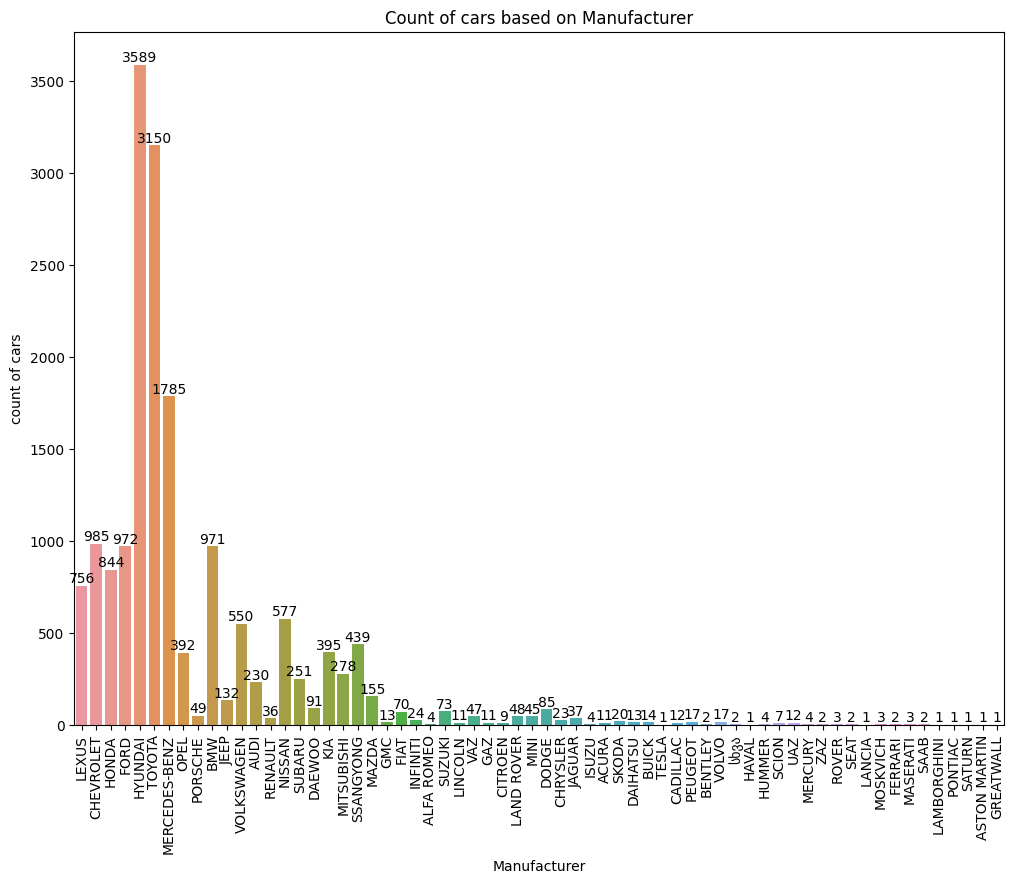

In [28]:
plt.figure(figsize = (12, 9))
ax = sns.countplot(x="Manufacturer", data=df)

ax.bar_label(ax.containers[0], label_type='edge')
plt.title("Count of cars based on Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("count of cars")
plt.xticks(rotation=90)
plt.show()

According to data shown in the Manufacturer column, The Hyundai product has the highest level available compared to other manufacturers. This also references someone's interest in cars, which can be seen based on the company.

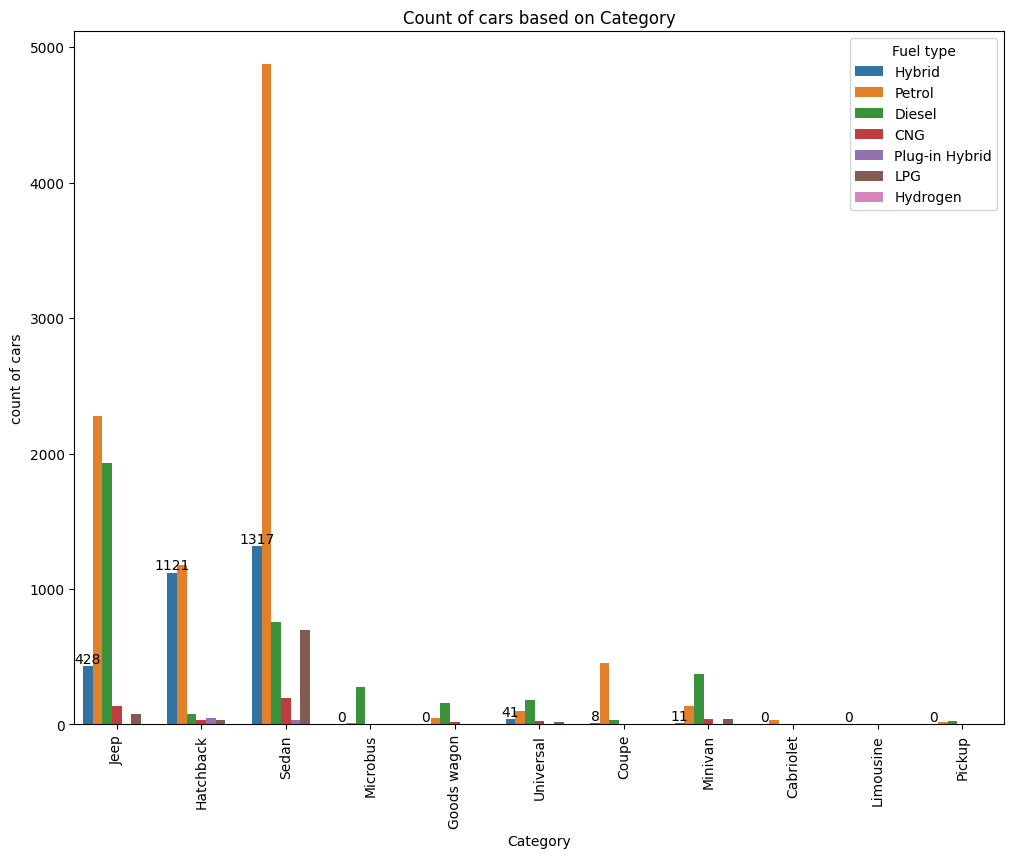

In [29]:
plt.figure(figsize = (12, 9))
ax = sns.countplot(x="Category", data=df, hue="Fuel type")

ax.bar_label(ax.containers[0], label_type='edge')
plt.title("Count of cars based on Category")
plt.xlabel("Category")
plt.ylabel("count of cars")
plt.xticks(rotation=90)
plt.show()

This data showed that the sedan car had the highest number available with petrol as the fuel type.

In [30]:
df.Model.value_counts()

Sonata                    987
Prius                     901
Elantra                   871
Camry                     784
Santa FE                  522
                         ... 
Musa                        1
1500,1600 Schtufenheck      1
E 420                       1
C 250 luxury                1
Prius C aqua                1
Name: Model, Length: 1567, dtype: int64

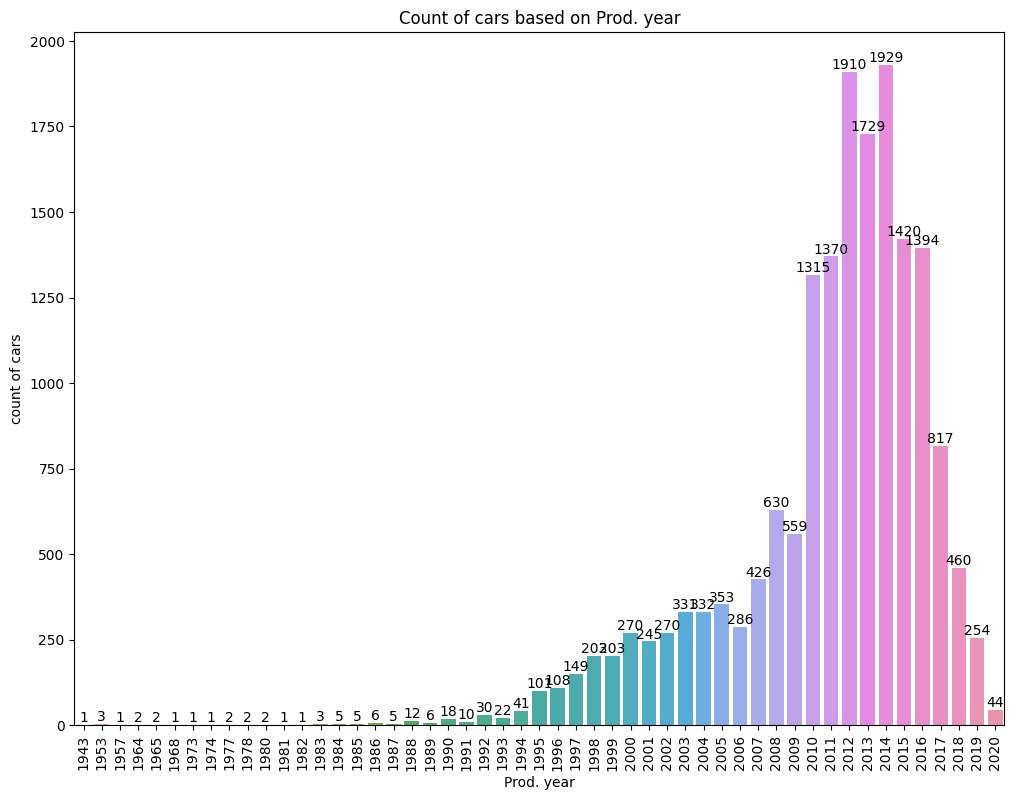

In [31]:
plt.figure(figsize = (12, 9))
ax = sns.countplot(x="Prod. year", data=df,)

ax.bar_label(ax.containers[0], label_type='edge')
plt.title("Count of cars based on Prod. year")
plt.xlabel("Prod. year")
plt.ylabel("count of cars")
plt.xticks(rotation=90)
plt.show()

The column for the year shows data with the car year (2014) reaching the highest level compared to the others. 

## Data Preprocessing

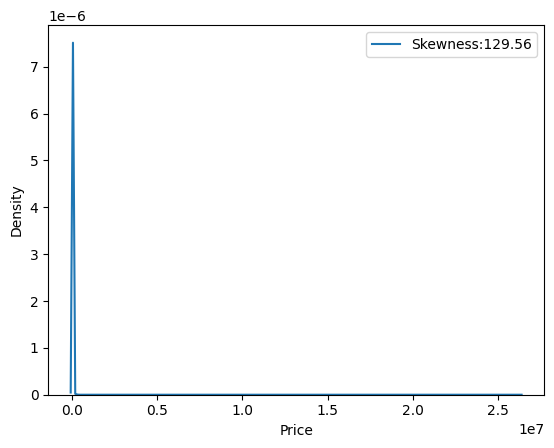

In [32]:
sns.kdeplot(df["Price"], label='Skewness:%.2f'%(df['Price'].skew()))
plt.legend()
plt.show()

From the above graph, we can see that the data is highly skewed (129.56)

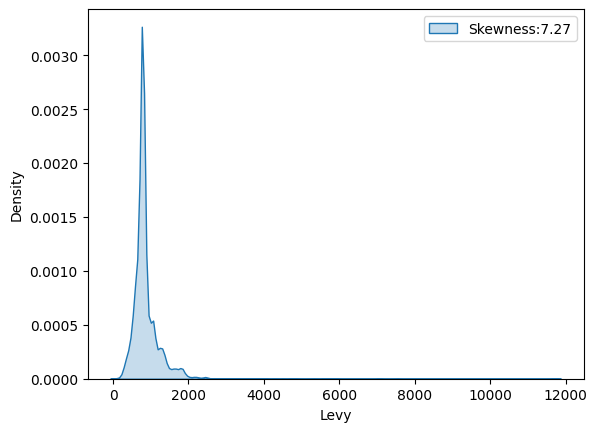

In [33]:
sns.kdeplot(df["Levy"], label='Skewness:%.2f'%(df['Levy'].skew()), fill=True)
plt.legend()
plt.show()

 From the graph above it can be seen that the distribution is similar to a normal distribution with the right degree of slope.

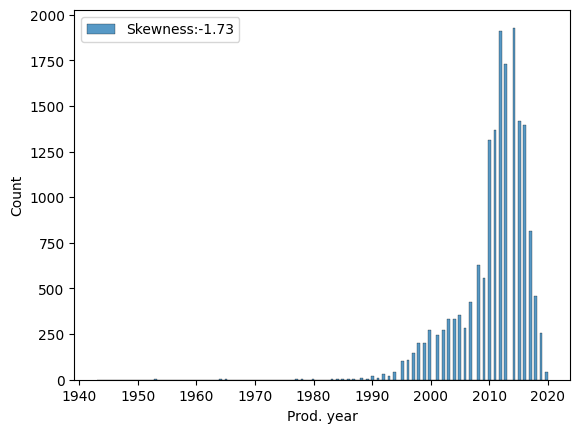

In [34]:
sns.histplot(df["Prod. year"], label='Skewness:%.2f'%(df['Prod. year'].skew()), fill=True)
plt.legend()
plt.show()

 From the graph above it can be seen the result skewness (-1.73)

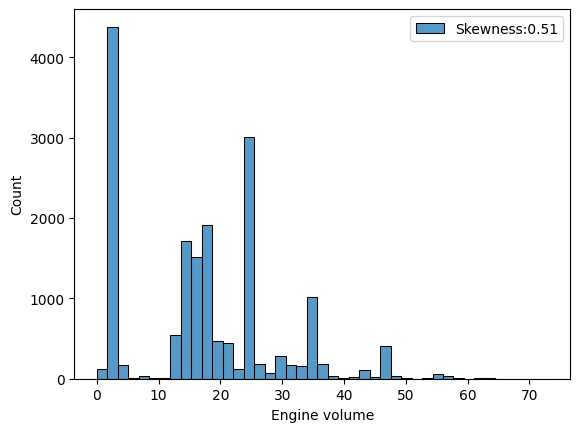

In [35]:
sns.histplot(df["Engine volume"], label='Skewness:%.2f'%(df['Engine volume'].skew()), fill=True)
plt.legend()
plt.show()

 From the graph above it can be seen the data has skewness (0,51)

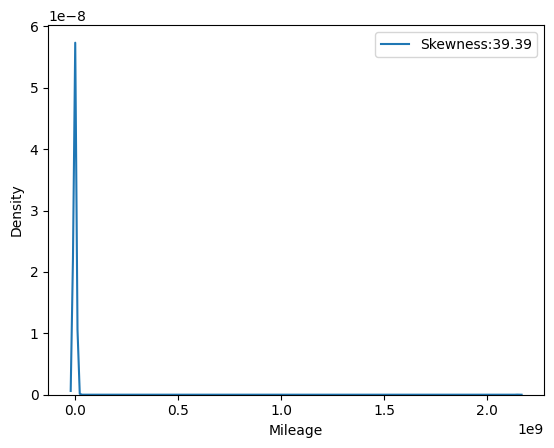

In [36]:
sns.kdeplot(df["Mileage"], label='Skewness:%.2f'%(df["Mileage"].skew()))
plt.legend()
plt.show()

From the graph above it can be seen the data is highly skewed (39.39)

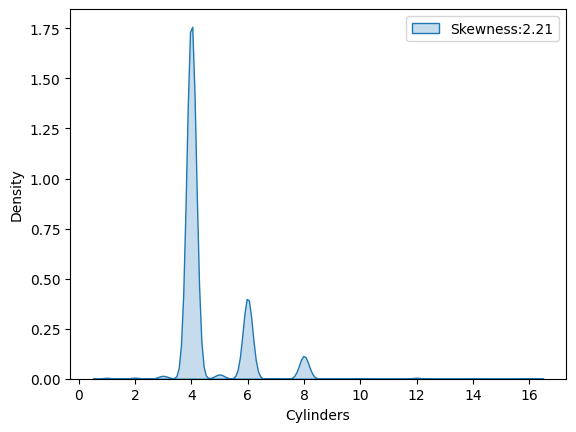

In [37]:
sns.kdeplot(df["Cylinders"], label='Skewness:%.2f'%(df["Cylinders"].skew()), fill=True)
plt.legend()
plt.show()

From the graph above it we can see the data has skewness (2.21)

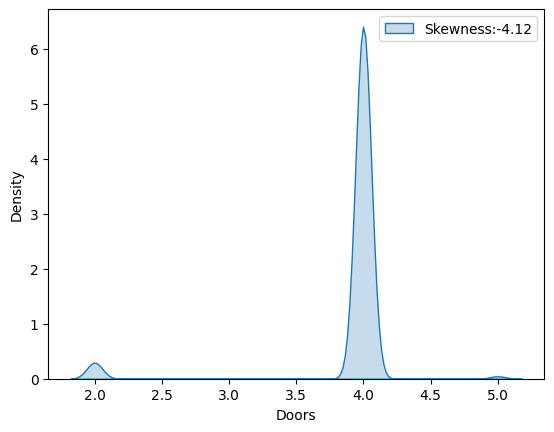

In [38]:
sns.kdeplot(df["Doors"], label='Skewness:%.2f'%(df["Doors"].skew()), fill=True)
plt.legend()
plt.show()

From the graph above it the data has skewness (-4.12)

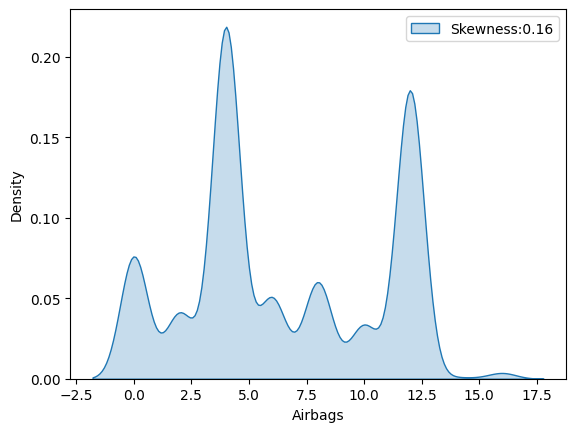

In [39]:
sns.kdeplot(df["Airbags"], label='Skewness:%.2f'%(df["Airbags"].skew()), fill=True)
plt.legend()
plt.show()

From the graph above it can be seen the data has less skewness.

### Handling outliers

0 Price
1 Levy
2 Prod. year
3 Mileage
4 Cylinders
5 Doors
6 Airbags
7 Engine volume


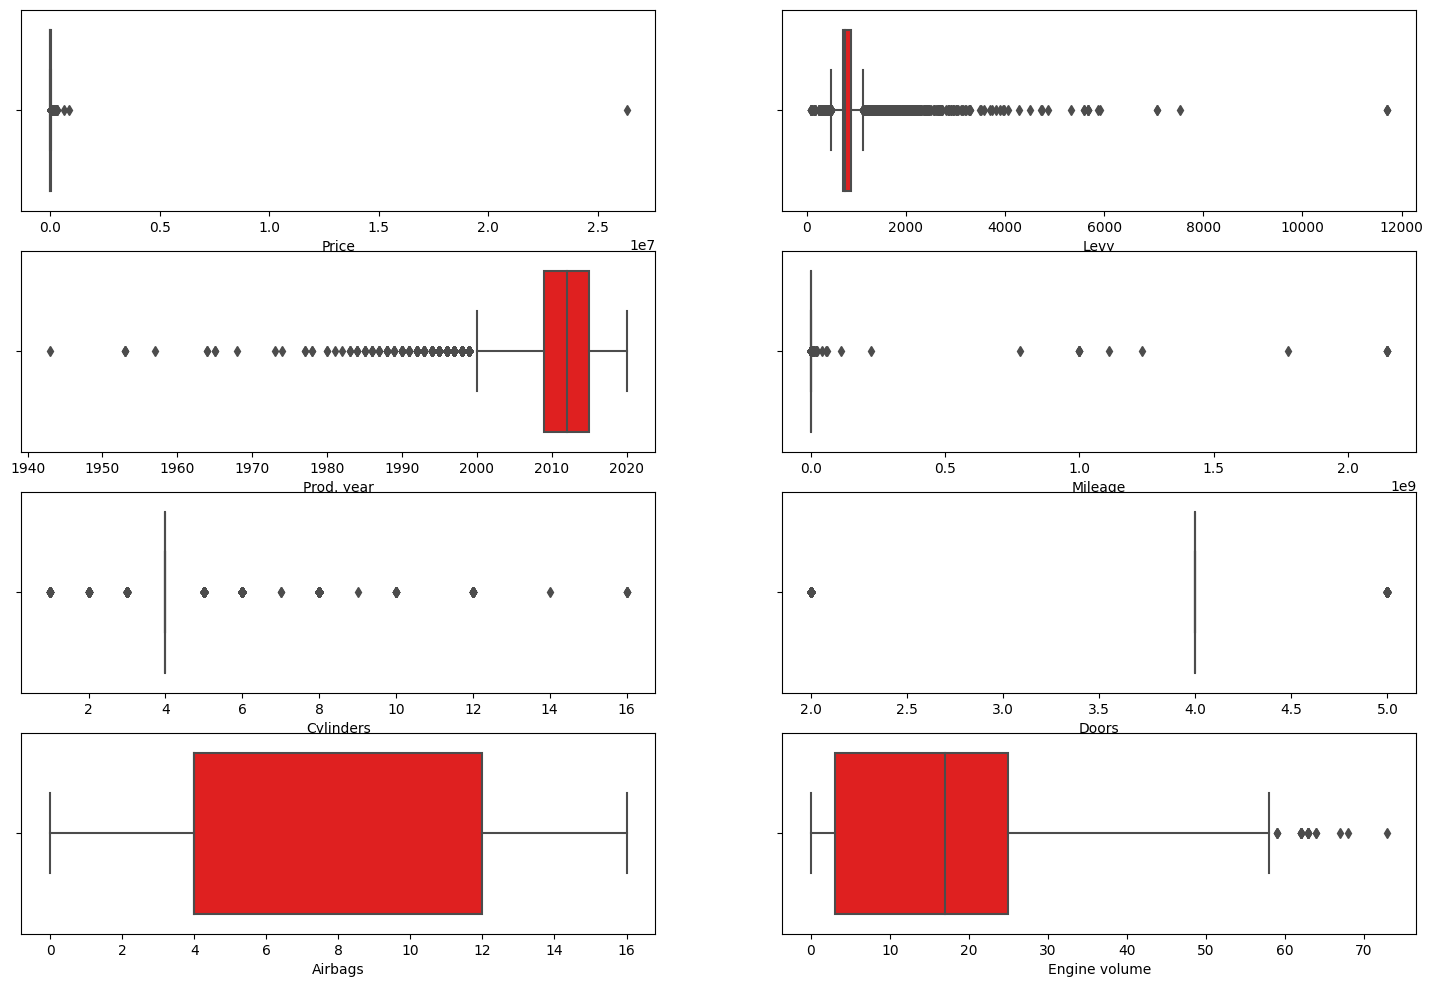

In [40]:
# check outliers
col = ['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders','Doors','Airbags','Engine volume'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(4,2,i+1)
    sns.boxplot(x=v, data=full_df,color='red')
plt.show()

From the graph above, it showed that the variable has outliers, we will handle these outliers for a good result model.

In [41]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(full_df, 2, ['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags',
                                               'Engine volume','Doors'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 419 indices:  [90, 211, 420, 483, 573, 723, 724, 747, 1019, 1083, 1128, 1225, 1265, 1278, 1364, 1459, 1509, 1562, 1662, 1823, 2010, 2054, 2283, 2691, 2726, 2799, 2912, 2922, 2932, 2942, 2965, 3086, 3487, 3686, 3705, 3707, 3765, 3905, 3950, 4068, 4183, 4237, 4351, 4465, 4649, 4661, 4722, 4919, 5008, 5259, 5419, 5485, 5514, 5541, 5667, 5731, 5840, 5940, 5962, 6152, 6299, 6335, 6405, 6457, 6768, 6826, 6887, 6950, 6953, 7010, 7031, 7094, 7147, 7165, 7247, 7254, 7318, 7667, 7718, 7749, 7970, 7997, 8036, 8147, 8246, 8331, 8541, 8620, 8644, 8706, 8755, 9101, 9136, 9172, 9200, 9212, 9233, 9327, 9367, 9405, 9441, 9452, 9688, 9739, 9857, 9972, 10082, 10085, 10220, 10423, 10520, 10690, 10710, 10714, 10948, 11038, 11041, 11166, 11210, 11270, 11354, 11529, 11554, 11902, 11906, 11973, 12152, 12224, 13037, 13144, 13265, 13320, 13324, 13325, 13534, 13572, 13631, 13653, 13687, 13847, 13889, 13941, 13973, 14151, 14229, 14356, 14435, 14675, 14677, 14752, 14767, 14871, 14876, 15031, 152

In [42]:
final_data = full_df.drop(outliers_to_drop, axis = 0).reset_index(drop = True)

### Model Devolopment

We used several models to compare the best results.
1.Multiple Linear Regresion
2.Decision Tree Regresion
3.Random Forest Regresion

In [43]:
X = final_data.drop('Price', axis=1)
y = final_data['Price']

In [44]:
#Defined object from library Regression 

LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()

In [45]:
# feature scallng on training data
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [46]:
### Dividing the dataset into train and test in the ratio of 80 : 20

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 27, shuffle = True)

In [47]:
# make for loop for Regression 

model = [LR,DTR,RFR]
q = {}
for i in model:
    i.fit(X_train,Y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(Y_test,ypred)*100)
    q.update({str(i):i.score(X_test,Y_test)*100})

LinearRegression() : 16.478729378379775
DecisionTreeRegressor() : 50.82163551531276
RandomForestRegressor() : 74.84725307232749


From the above table, we can see that the model Random Forest Regression has the least  the highest R-squared value of 74.1
1. LinearRegression = 16.4
2. DecisionTreeRegressor = 50.8
3. RandomForestRegressor = 74.8